In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import math
from sklearn.svm import SVR, LinearSVR, SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [2]:
sys.path.insert(0, r'../src')
from function_cache import *

In [5]:
T_0min = pd.read_csv('../data/processed/price_before_close/T_0min.csv', index_col='Trading_Day', parse_dates=True)
TF_0min = pd.read_csv('../data/processed/price_before_close/TF_0min.csv', index_col='Trading_Day', parse_dates=True)
T_5min = pd.read_csv('../data/processed/price_before_close/T_5min.csv', index_col='Trading_Day', parse_dates=True)
TF_5min = pd.read_csv('../data/processed/price_before_close/TF_5min.csv', index_col='Trading_Day', parse_dates=True)
T_10min = pd.read_csv('../data/processed/price_before_close/T_10min.csv', index_col='Trading_Day', parse_dates=True)
TF_10min = pd.read_csv('../data/processed/price_before_close/TF_10min.csv', index_col='Trading_Day', parse_dates=True)
T_15min = pd.read_csv('../data/processed/price_before_close/T_15min.csv', index_col='Trading_Day', parse_dates=True)
TF_15min = pd.read_csv('../data/processed/price_before_close/TF_15min.csv', index_col='Trading_Day', parse_dates=True)

In [6]:
T_features = pd.read_csv('../data/processed/candidate_features/T_features.csv', index_col=0)
TF_features = pd.read_csv('../data/processed/candidate_features/TF_features.csv', index_col=0)

T_spread_change = pd.read_csv('../data/processed/different_ys/T_spread_change.csv', index_col=0)
TF_spread_change = pd.read_csv('../data/processed/different_ys/TF_spread_change.csv', index_col=0)

In [7]:
features = pd.concat([T_features, TF_features])
spread_change = pd.concat([T_spread_change, TF_spread_change])

In [8]:
spread_sign = np.sign(spread_change)

X = features.values
y = spread_sign['0min_0min'].values

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
def f_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

In [11]:
plt.rcParams['figure.figsize'] = [25, 15]

## Tuning C

In [12]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,  0.1, 1, 10]

In [13]:
for C in C_list:
    svc = SVC(kernel='linear', C=C)
    svc.fit(X, y)
    print(C, ': ', svc.score(X, y))

0.0001 :  0.6410256410256411
0.0005 :  0.6410256410256411
0.001 :  0.6410256410256411
0.005 :  0.6410256410256411
0.01 :  0.6410256410256411
0.05 :  0.8974358974358975
0.1 :  0.9230769230769231
1 :  0.9487179487179487
10 :  0.9743589743589743


In [83]:
for C in C_list:
    svc = LinearSVC(C=C, max_iter=10000)
    svc.fit(X, y)
    print(C, ': ', svc.score(X, y))

0.0001 :  0.7435897435897436
0.0005 :  0.7692307692307693
0.001 :  0.7948717948717948
0.005 :  0.8205128205128205
0.01 :  0.8717948717948718
0.05 :  0.9230769230769231
0.1 :  0.9230769230769231
1 :  0.9487179487179487
10 :  1.0


In [20]:
n = 6
kf = KFold(n_splits=n, shuffle=True)
score = pd.DataFrame(index=range(n), columns=C_list)
i = 0

for train_index, test_index in kf.split(X):
    print(test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for C in C_list:
        svc = SVC(kernel='linear', C=C)
        svc.fit(X_train, y_train)
        score.loc[i, C] = svc.score(X_test, y_test)
    i = i + 1
    
score.mean()

[ 6 10 11 23 27 31 35]
[ 2  3  9 12 18 20 34]
[ 8 13 16 22 28 36 38]
[ 0 14 17 21 26 33]
[ 1  4  5 25 29 32]
[ 7 15 19 24 30 37]


0.0001     0.638889
0.0005     0.638889
0.0010     0.638889
0.0050     0.638889
0.0100     0.638889
0.0500     0.575397
0.1000     0.575397
1.0000     0.547619
10.0000    0.599206
dtype: float64

In [ ]:
prob 

# Classifier

In [21]:
svc = SVC(C=0.1, kernel='linear')
svc.fit(X, y)
svc.score(X, y)

0.9230769230769231

In [22]:
y_pred = svc.predict(X)
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.])

In [23]:
coef_sr = pd.Series(svc.coef_[0], index=features.columns)
coef_sr

5d_spread_change                 -0.191397
10d_spread_change                -0.193403
15d_spread_change                -0.116950
20d_spread_change                 0.263023
10d_act_price_exp_mva             0.251803
-1d_corr_act_price_def_OI        -0.049136
-1d_corr_def_price_def_OI        -0.044830
10d_spread_std_divided_by_std     0.221672
10d_current_price                 0.067954
1d_z_diff_act_price_def_price    -0.361217
-1d_corr_act_price_def_volume    -0.072702
-1d_corr_def_price_def_volume    -0.057318
10d_current_spread                0.018162
-1d_std                           0.133617
-1d_corr_act_price_def_price     -0.314402
-1d_corr_act_OI_def_volume       -0.105928
-1d_corr_act_OI_def_OI           -0.064778
-1d_corr_def_volume_def_OI        0.071191
-1d_corr_def_OI_spread            0.259034
-1d_corr_def_volume_spread        0.181289
1d_z_diff_act_price_def_OI        0.265145
-1d_corr_act_volume_def_volume   -0.203929
-1d_corr_act_volume_def_OI        0.148207
-1d_corr_ac

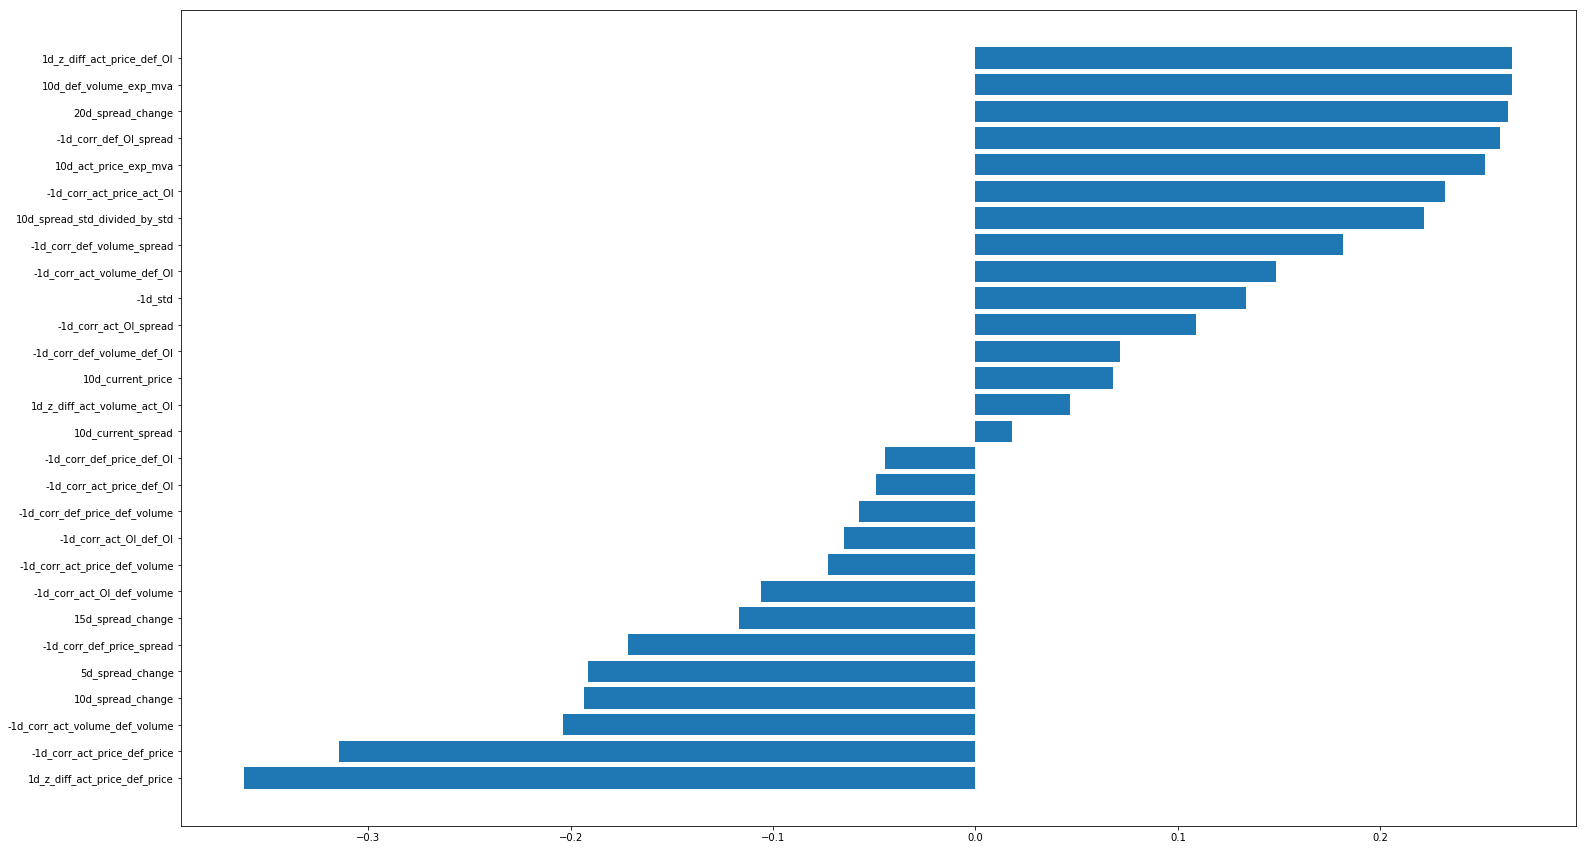

In [24]:
f_importances(svc.coef_[0], features.columns)

In [25]:
y_pos_sr = pd.Series(spread_change.index, index=y)
y_pos_idx = y_pos_sr.loc[1].values
y_neg_idx = y_pos_sr.loc[-1].values

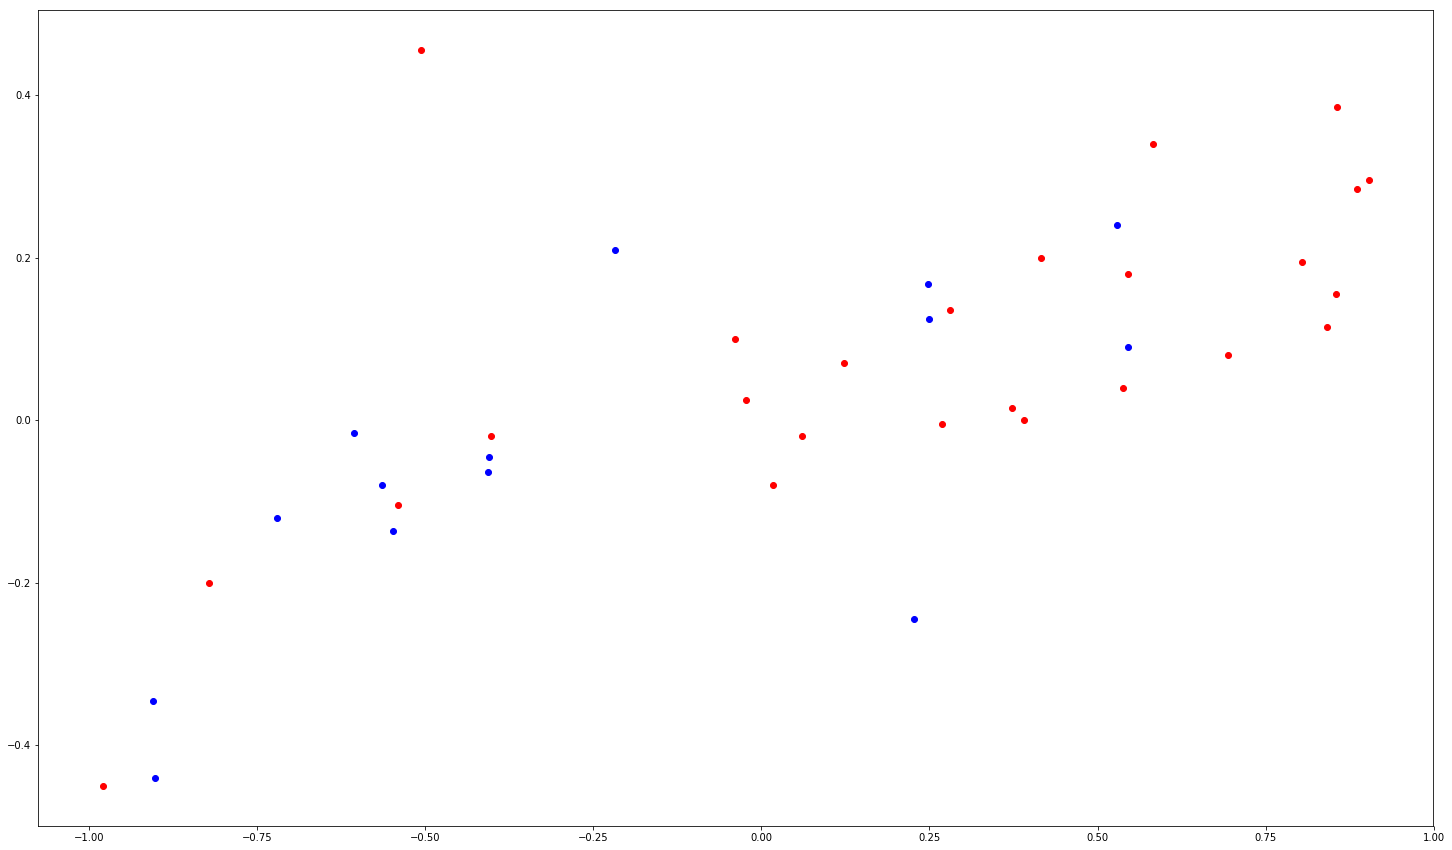

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(features.loc[y_pos_idx, '-1d_corr_def_OI_spread'].values, 
           features.loc[y_pos_idx, '20d_spread_change'].values, c='r')
ax.scatter(features.loc[y_neg_idx, '-1d_corr_def_OI_spread'].values, 
           features.loc[y_neg_idx, '20d_spread_change'].values, c='b')

In [62]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

In [29]:
model = SelectFromModel(svc, prefit=True)
X_new = model.transform(X)

In [30]:
X_new.shape

(39, 14)

In [100]:
def featImpMDI(fit, featNames):
    # feature importance based on IS mean impurity reduction
    df0 = {i:tree.feature_importances_ for i, tree in enumerate(fit.estimators_)}
    df0 = pd.DataFrame.from_dict(df0, orient='index')
    df0.columns = featNames
    df0 = df0.replace(0, np.nan)
    imp = pd.concat({'mean': df0.mean(), 'std': df0.std()*df0.shape[0]**-.5}, axis=1)
    imp /= imp['mean'].sum()
    return imp

In [117]:
clf = RandomForestClassifier(n_estimators=2000, max_features=1)
clf = clf.fit(X, y)
clf.feature_importances_  

array([0.03419308, 0.03156259, 0.03044212, 0.03974052, 0.03834592,
       0.03315956, 0.03520995, 0.03565025, 0.031614  , 0.04266483,
       0.03509654, 0.03311106, 0.03542545, 0.03096674, 0.03166316,
       0.03436483, 0.0352925 , 0.03288663, 0.04702706, 0.04439605,
       0.03670628, 0.03335198, 0.0314368 , 0.03623282, 0.03721112,
       0.04267737, 0.03434748, 0.0352233 ])

In [118]:
featImp = featImpMDI(clf, features.columns).sort_values(by='mean')

In [119]:
featImp['ratio'] = featImp['mean'] / featImp['std']

In [120]:
featImp

,mean,std,ratio
-1d_std,0.030099,0.000501,60.106391
10d_spread_change,0.031137,0.000488,63.745192
15d_spread_change,0.031607,0.000488,64.717839
-1d_corr_act_price_def_price,0.031710,0.000481,65.948617
-1d_corr_act_volume_def_volume,0.031793,0.000494,64.391367
-1d_corr_def_price_def_volume,0.032236,0.000531,60.672161
-1d_corr_def_volume_def_OI,0.032606,0.000545,59.867079
-1d_corr_act_price_def_OI,0.033837,0.000512,66.084645
-1d_corr_def_price_def_OI,0.033891,0.000505,67.112660
-1d_corr_act_volume_def_OI,0.033945,0.000572,59.321746


In [121]:
feature_importances = pd.Series(clf.feature_importances_, index=features.columns)
feature_importances.sort_values()

15d_spread_change                 0.030442
-1d_std                           0.030967
-1d_corr_act_volume_def_OI        0.031437
10d_spread_change                 0.031563
10d_current_price                 0.031614
-1d_corr_act_price_def_price      0.031663
-1d_corr_def_volume_def_OI        0.032887
-1d_corr_def_price_def_volume     0.033111
-1d_corr_act_price_def_OI         0.033160
-1d_corr_act_volume_def_volume    0.033352
5d_spread_change                  0.034193
-1d_corr_act_OI_spread            0.034347
-1d_corr_act_OI_def_volume        0.034365
-1d_corr_act_price_def_volume     0.035097
-1d_corr_def_price_def_OI         0.035210
-1d_corr_def_price_spread         0.035223
-1d_corr_act_OI_def_OI            0.035292
10d_current_spread                0.035425
10d_spread_std_divided_by_std     0.035650
-1d_corr_act_price_act_OI         0.036233
1d_z_diff_act_price_def_OI        0.036706
1d_z_diff_act_volume_act_OI       0.037211
10d_act_price_exp_mva             0.038346
20d_spread_

# Classifier for Selected Features

In [33]:
X[:, 18]

array([-0.08666677,  0.56032669,  1.45277825,  1.34515282, -1.82031248,
        0.60461549,  0.89412483, -1.37216262, -1.05841497, -0.49736782,
        1.2799259 ,  0.53026383,  0.81726098, -0.01240458,  1.36936867,
        1.0886591 , -1.69122748,  0.31382675,  0.83126198, -0.82455982,
       -1.07206599, -1.17309349,  0.27619334, -0.99875047,  0.3495793 ,
        0.36875136,  1.37144444, -1.09892068,  0.09647125,  1.42284523,
       -1.68693269, -1.54572963, -0.82188556,  0.83107228,  0.80250306,
       -0.81735164, -0.1564849 ,  0.31536027, -0.18745422])

In [60]:
n = 8
kf = KFold(n_splits=n, shuffle=True)
score = pd.DataFrame(index=range(n), columns=C_list)
i = 0

for train_index, test_index in kf.split(X[:, 18].reshape(-1, 1)):
    print(test_index)
    X_train, X_test = X[:, 18].reshape(-1, 1)[train_index], X[:, 18].reshape(-1, 1)[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for C in C_list:
        svc = SVC(kernel='linear', C=C)
        svc.fit(X_train, y_train)
        score.loc[i, C] = svc.score(X_test, y_test)
    i = i + 1
    
score.mean()

[12 17 19 29 33]
[ 5  6 13 14 34]
[ 1  7 11 20 22]
[10 21 23 36 37]
[ 8  9 16 25 38]
[ 0  2 26 28 35]
[ 3 24 27 31 32]
[ 4 15 18 30]


0.0001     0.6375
0.0005     0.6375
0.0010     0.6375
0.0050     0.6375
0.0100     0.6375
0.0500     0.6375
0.1000     0.6125
1.0000     0.6625
10.0000    0.6625
dtype: float64

In [61]:
svc = SVC(kernel='linear')
svc.fit(X[:, 18].reshape(-1, 1), y)
svc.score(X[:, 18].reshape(-1, 1), y)

0.717948717948718

In [61]:
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.])

In [60]:
y_pred = svc.predict(X[:, 18].reshape(-1, 1))
y_pred

array([ 1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,
        1., -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.])

In [63]:
(y == y_pred).mean()

0.717948717948718

In [66]:
(y == 1).mean()

0.6410256410256411